MAE: 5.34 mm
RMSE: 11.28 mm


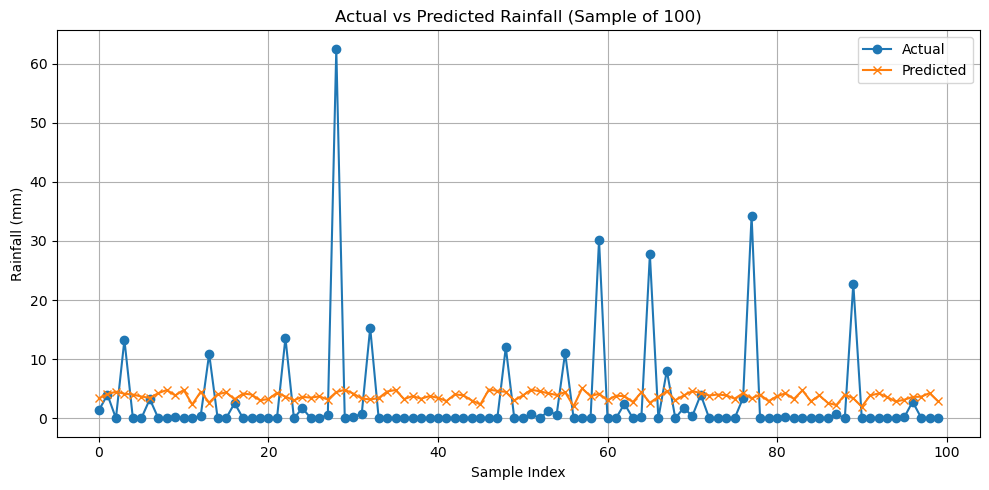

In [2]:
# 📦 Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# 📁 Load Dataset
df = pd.read_csv("Indian Rainfall Dataset District-wise Daily Measurements.csv", sep=';')

# 🧼 Convert Wide Format to Long Format
df_long = df.melt(
    id_vars=['state', 'district', 'month'],
    var_name='day',
    value_name='rainfall'
)

# 🗓️ Create Proper Date Column
df_long['day'] = df_long['day'].str.replace('st|nd|rd|th', '', regex=True).astype(int)
df_long['date'] = pd.to_datetime({'year': 2023, 'month': df_long['month'], 'day': df_long['day']}, errors='coerce')
df_long.dropna(subset=['date'], inplace=True)

# 🔤 Encode Districts
le = LabelEncoder()
df_long['district_encoded'] = le.fit_transform(df_long['district'])

# 🎯 Define Features and Target
df_long['day'] = df_long['date'].dt.day
df_long['month'] = df_long['date'].dt.month
X = df_long[['district_encoded', 'month', 'day']]
y = df_long['rainfall']

# 📊 Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧠 Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# 🔮 Predict
y_pred = model.predict(X_test)

# 📈 Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"MAE: {mae:.2f} mm")
print(f"RMSE: {rmse:.2f} mm")

# 📉 Plot Actual vs Predicted Rainfall
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred[:100], label='Predicted', marker='x')
plt.title('Actual vs Predicted Rainfall (Sample of 100)')
plt.xlabel('Sample Index')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
